## 2. Probability Distributions

In [188]:
using PyPlot
using Formatting
using Random
using Distributions
using LinearAlgebra
using Printf

Random.seed!(1234);

### 2.1 Binary Variables

In [296]:
ber = Bernoulli(0.25)
x = rand(ber, 1000)

ber_fit = fit(Bernoulli, x)

Array{Int64,1}


Bernoulli{Float64}(p=0.253)

#### 2.1.1. The beta distributions

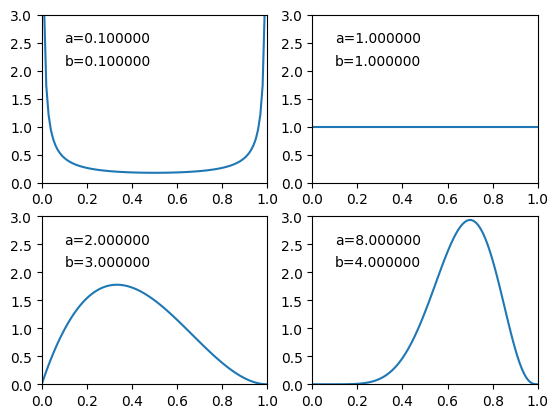

In [215]:
fig = figure()
x = range(0, stop=1, length=100)
for (i, (a, b)) in enumerate([[0.1, 0.1], [1, 1], [2, 3], [8, 4]])
    fignum = 220+i
    subplot(fignum)
    beta = Beta(a, b)
    PyPlot.xlim(0, 1)
    PyPlot.ylim(0, 3)
    PyPlot.plot(x, pdf.(beta, x))
    PyPlot.annotate(format("a={:f}", a), (0.1, 2.5))
    PyPlot.annotate(format("b={:f}", b), (0.1, 2.1))
end
PyPlot.show()

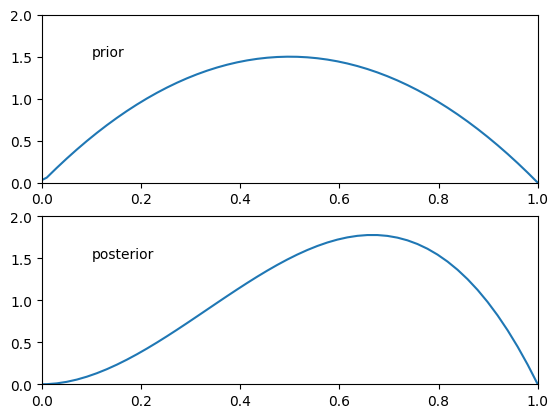

In [264]:
a = 2.0
b = 2.0
mu_prior = Beta(a, b)
xmu_prior = pdf.(mu_prior, x)

fig = figure()
PyPlot.subplot(211)
PyPlot.xlim(0, 1)
PyPlot.ylim(0, 2)
PyPlot.plot(x, xmu_prior)
PyPlot.annotate("prior", (0.1, 1.5))

function posterior_mu_beta(X, a, b)
    
    N = length(X)
    a_ = a
    b_ = N + b
    for xn in X
        a_ = a_ + xn
        b_ = b_ - xn
    end
    
    mu = Beta(a_, b_)
    
    return mu
end

x_data = [1.0]
mu_posterior = posterior_mu_beta(x_data, a, b)
xmu_posterior = pdf.(mu_posterior, x)
PyPlot.subplot(212)
PyPlot.xlim(0, 1)
PyPlot.ylim(0, 2)
PyPlot.plot(x, xmu_posterior)
PyPlot.annotate("posterior", (0.1, 1.5))

plt.show()

In [77]:
@printf "Maximum likelihood estimation \n"
bel_mle = fit_mle(Bernoulli, [1])
@printf "%d out of 10000 is 1 \n" sum(rand(bel_mle, 10000)) 

@printf "Bayesian estimation \n"
x_data = [1.0]
bel_bayese = posterior_mu(x_data, 1.0, 1.0)
@printf "%d out of 10000 is 1 \n" sum(rand(bel_bayese, 10000)) 

Maximum likelihood estimation 
10000 out of 10000 is 1 
Bayesian estimation 
6660 out of 10000 is 1 


## 2.2 Multinomial Variables

In [110]:
cat = Categorical([0.5, 0.25, 0.25])
x = rand(cat, 1000)

cat_fit = fit(Categorical, x)

DiscreteNonParametric{Int64,Float64,Base.OneTo{Int64},Array{Float64,1}}(support=Base.OneTo(3), p=[0.479, 0.257, 0.264])

### 2.2.1 The Dirichlet distribution

In [115]:
mu = Dirichlet(ones(3))
mu_data = rand(mu, 1)
println(mu_data)

cat = Categorical(reshape(mu_data, 3))
data = rand(cat, 100)

cat_fit = fit_mle(Categorical, data)
print(cat_fit)

[0.12117; 0.414798; 0.464032]
DiscreteNonParametric{Int64,Float64,Base.OneTo{Int64},Array{Float64,1}}(support=Base.OneTo(3), p=[0.09, 0.45, 0.46])

## 2. 3 The Gaussian Distribution

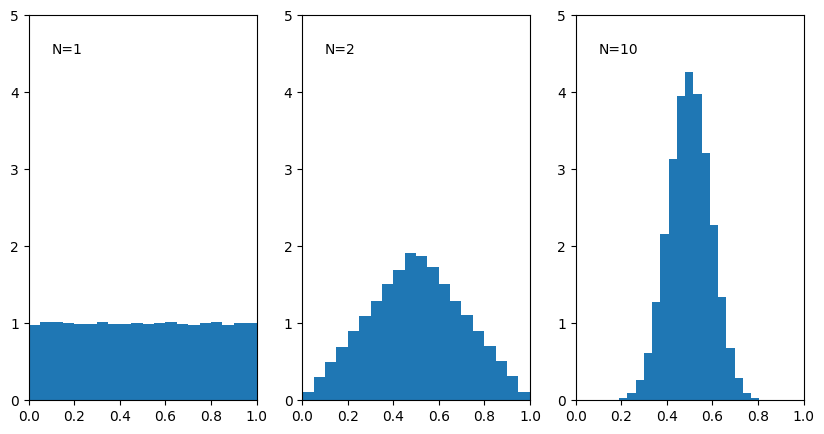

In [138]:
uniform = Uniform(0, 1)
fig = figure(figsize=(10, 5))

PyPlot.subplot(131)
PyPlot.xlim(0, 1)
PyPlot.ylim(0, 5)
PyPlot.annotate("N=1", (0.1, 4.5))
PyPlot.plt.hist(rand(uniform, 100000), normed=true, bins=20, alpha=1.0)

PyPlot.subplot(132)
PyPlot.xlim(0, 1)
PyPlot.ylim(0, 5)
PyPlot.annotate("N=2", (0.1, 4.5))
PyPlot.plt.hist(0.5 * ( rand(uniform, 100000) + rand(uniform, 100000) ), bins=20, normed=true)

PyPlot.subplot(133)
PyPlot.xlim(0, 1)
PyPlot.ylim(0, 5)
sample = zeros(100000)
for _ in 1:10
    sample = sample + rand(uniform, 100000)
end
PyPlot.annotate("N=10", (0.1, 4.5))
PyPlot.plt.hist(sample * 0.1, bins=20, normed=true)

PyPlot.show()

### 2.3.4 Maximum Likelihood for the Gaussian

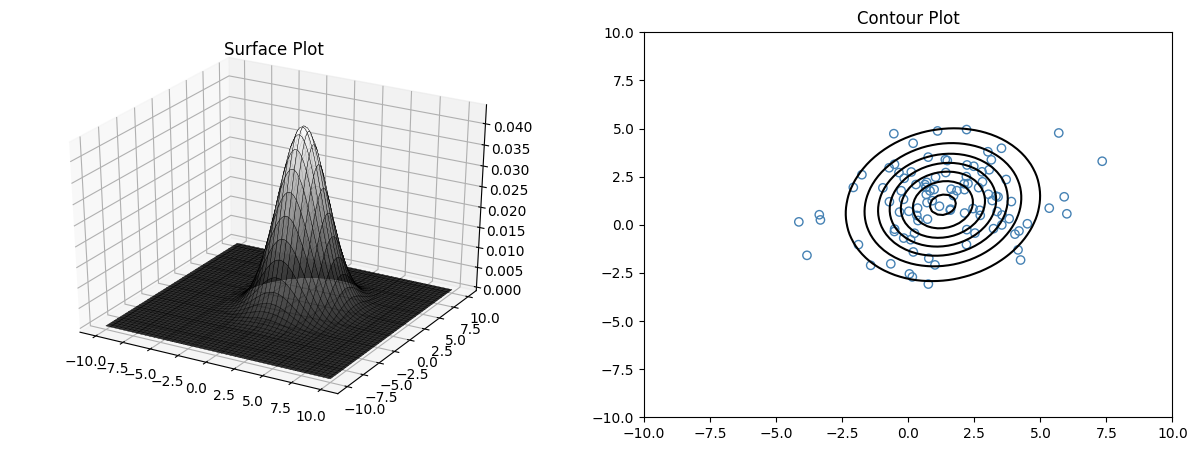

FullNormal(
dim: 2
μ: [1.0413, 1.31051]
Σ: [3.97034 0.422386; 0.422386 3.40819]
)



In [267]:
X = rand(Normal(1.0, 2.0), (2, 100))

gaussian = fit(MvNormal, X)
println(gaussian)
data_gaussian = rand(gaussian, 100)

n=100
x = range(-10, stop=10, length=n)
y = range(-10, stop=10, length=n)
xgrid = repeat(x', n, 1)
ygrid = repeat(y, 1, n)

z = zeros(n, n)
for i in 1:n
    for j in 1:n
        z[i:i, j:j] .= pdf(gaussian, [x[i]; y[j]])
    end
end

fig = figure("pyplot_surfaceplot", figsize=(15, 5))
fig.add_subplot(1, 2, 1, projection="3d")
PyPlot.plot_surface(xgrid, ygrid, z, rstride=2, edgecolors="k", cstride=2, cmap=ColorMap("gray"), alpha=0.8, linewidth=0.25)
PyPlot.title("Surface Plot")

fig.add_subplot(1, 2, 2)
PyPlot.scatter(data_gaussian[1, :], data_gaussian[2, :], facecolor="none", edgecolor="steelblue")
PyPlot.contour(xgrid, ygrid, z, colors="black", linewidth=2.0)
PyPlot.title("Contour Plot")
PyPlot.show()

### 2.3.6 Bayesian inference for the Gaussian

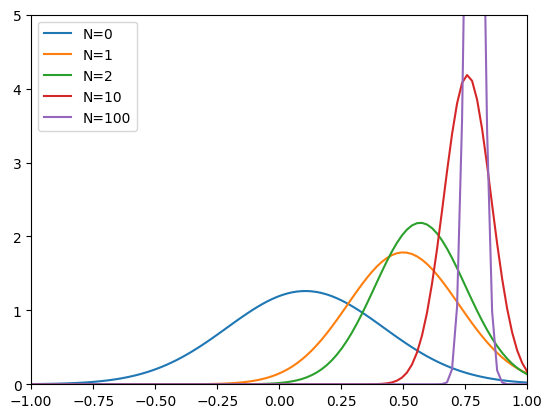

In [269]:
x = range(-1, stop=1, length=100)

function posterior_mu_gaussian(X, m, lambda_mu, lambda)
    
    N = length(X)
    lambda_mu_ = N * lambda + lambda_mu
    m_ = lambda_mu * m
    for xn in X
        m_ = m_ + lambda * xn
    end
    m_ = m_ / lambda_mu_
    
    mu = Normal(m_, 1/lambda_mu_^(1/2))
    
    return mu
end

m = 0
sigma_mu = 0.1^(1/2)     # sigma^2=0.1
lambda_mu = 1/sigma_mu^2 # lambda = 1/sigma^2, 
lambda = lambda_mu

m_data = 0.8
sigma_data = 0.1^(1/2)   # sigma^2=0.1

mu_prior = Normal(m, sigma_mu)
mu = rand(mu_prior, 1)

# N=0
mu_posterior0 = Normal(mu[1], sigma_mu)
xmu_posterior0 = pdf.(mu_posterior0, x)
PyPlot.plot(x, xmu_posterior0, label="N=0")

# N=1
x_data = rand(Normal(m_data, sigma_data), 1)
mu_posterior1 = posterior_mu_gaussian(x_data, mu[1], lambda_mu, lambda)
xmu_posterior1 = pdf.(mu_posterior1, x)
PyPlot.plot(x, xmu_posterior1, label="N=1")

# N=2
append!(x_data, rand(Normal(m_data, sigma_data), 1))
mu_posterior2 = posterior_mu_gaussian(x_data, mu[1], lambda_mu, lambda)
xmu_posterior2 = pdf.(mu_posterior2, x)
PyPlot.plot(x, xmu_posterior2, label="N=2")

# N=10
append!(x_data, rand(Normal(m_data, sigma_data), 8))
mu_posterior3 = posterior_mu_gaussian(x_data, mu[1], lambda_mu, lambda)
xmu_posterior3 = pdf.(mu_posterior3, x)
PyPlot.plot(x, xmu_posterior3, label="N=10")

# N=100
append!(x_data, rand(Normal(m_data, sigma_data), 90))
mu_posterior4 = posterior_mu_gaussian(x_data, mu[1], lambda_mu, lambda)
xmu_posterior4 = pdf.(mu_posterior4, x)
PyPlot.plot(x, xmu_posterior4, label="N=100")

PyPlot.xlim(-1, 1)
PyPlot.ylim(0, 5)
PyPlot.legend()
PyPlot.show()

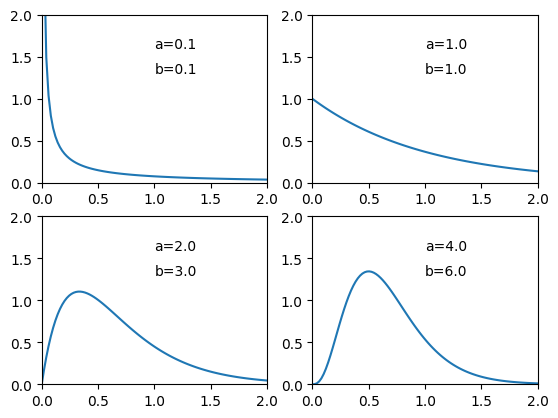

In [273]:
x = range(0, stop=2, length=100)
fig = figure()
for (i, (a, b)) in enumerate([[0.1, 0.1], [1, 1], [2, 3], [4, 6]])
    fig.add_subplot(2, 2, i)
    gamma = Gamma(a, 1/b)
    PyPlot.xlim(0, 2)
    PyPlot.ylim(0, 2)
    PyPlot.plot(x, pdf.(gamma, x))
    PyPlot.annotate(format("a={}", a), (1, 1.6))
    PyPlot.annotate(format("b={}", b), (1, 1.3))
end
PyPlot.show()

In [277]:
tau = Gamma(1.0, 1/1.0)
tau_ = rand(tau, 1)
mu = 0
model = Normal(mu, tau_[1])
println(model)

model = fit(Normal, rand(Normal(mu, 1.414^(1/2)), 100))
println(model)

Normal{Float64}(μ=0.0, σ=2.040476803048082)
Normal{Float64}(μ=-0.2861855326870682, σ=1.2367285839176794)


### 2.3.7 Student's t-distribution

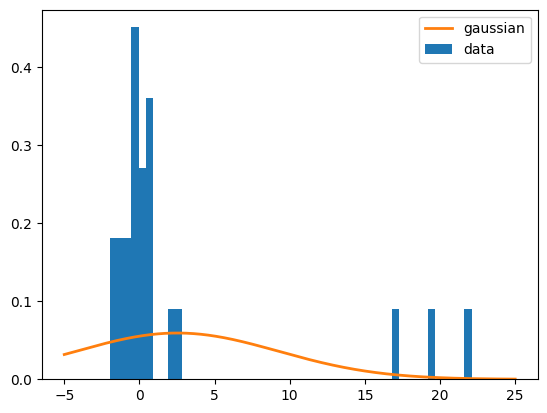

TDist{Float64}
Normal{Float64}(μ=2.5190187514094045, σ=6.723832410754743)


In [300]:
X = rand(Normal(0, 1), 20)
X = vcat(X, rand(Normal(20.0, 1.0), 3))
PyPlot.plt.hist(X, bins=50, normed=true, label="data")

students_t = TDist(1)

println(typeof(students_t))

gaussian = Normal(0.0, 1.0)

gaussian = fit(Normal, X)
#students_t = fit(TDist, X) # not implemented

println(gaussian)
#println(students_t)

x = range(-5, stop=25, length=1000)
#PyPlot.plot(x, pdf.(students_t, x) label="student's t", linewidth=2)
PyPlot.plot(x, pdf.(gaussian, x), label="gaussian", linewidth=2)
PyPlot.legend()
PyPlot.show()

In [313]:
mv = MvNormal(2, 1.0) # mu = [0, 0] sig = [1 0; 0 1]
x1 = rand(mv, 100)
x1 = x1 .+ [-5; -5]

x2 = rand(mv, 100)
x2 = x2 .+ [5; -5]

x3 = rand(mv, 100)
x3 = x3 .+ [0; 5]

X = hcat(x1, x2, x3)

#=
model = MultivariateGaussianMixture(n_components=3)
model.fit(X)
print(model)

x_test, y_test = np.meshgrid(np.linspace(-10, 10, 100), np.linspace(-10, 10, 100))
X_test = np.array([x_test, y_test]).reshape(2, -1).transpose()
probs = model.pdf(X_test)
Probs = probs.reshape(100, 100)
plt.scatter(X[:, 0], X[:, 1])
plt.contour(x_test, y_test, Probs)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()
=#

2×300 Array{Float64,2}:
 -6.32958  -7.00523  -3.89858  -3.60437  …  -1.14552  0.207929  1.45974
 -4.13483  -3.15145  -3.98042  -5.10982      5.22381  6.62124   5.02435